In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
names = [
    "$P-mean$",
    "$P-near$",
    "$P-far$",
    "$V-mean$",
    "$V-near$",
    "$V-far$",
    "$A-mean$",
    "$A-near$",
    "$A-far$",
    "$S-mean$",
    "$S-near$",
    "$S-far$",
    "$F$"
]
def read_and_average(folder_name, colnames, n_boids, n_columns):
    """
    Reads a file structure like:
    | folder_name
    | - - - |Run1
    | - - - | - - -| run1_results_0.json
    | - - - | - - -| run1_results_1.sjon
    | - - - |Run2
    | - - - | - - -| run2_results_0.json
    | - - - | - - -| run2_results_1.json
    | - - - |Run3
    ...................................

    Args:
        folder_name (str): Name of the root folder for example FoodCooldown5
        colnames (List[str]): The names of the columns. 
        n_boids (int): The number of boids
        n_columns (int): The number of columns (has to be 2 less than the final result).

    Returns:
        pd.DataFrame: The results dataframe.
    """
    # Accumuates the results for all runs.
    accumulator = np.zeros((20,n_boids,n_columns))

    # Loop over each run (10 in our case)
    for directory in os.listdir(folder_name):
        path_sub_dir = os.path.join(folder_name,directory)
        # Placehold for all generatiosn during that run
        run_accumulator = np.zeros((20,n_boids,n_columns))
        # For each generation
        
        # Fix sorting issue
        l = os.listdir(path_sub_dir)
        l += l[1:11]
        l = l[:1] + l[11:]
        
        for g,_file in enumerate(l):
            # 1. Read and transform the files into a table with all columns + FOOD EATEN and DENSITY.
            # 2. Read Json into datafram.e The frame is Boid 1..N columns where 
            # 3. the first row is an array with all the weights,
            # 4. the second is the food each boid ate
            # 5. the third is the density for each boid
            # 6. Transform it to table with weights + food + density as columns
            # 7. And each Boids with its values as rows. 
            generation_raw = pd.read_json(os.path.join(path_sub_dir,_file))
            one_result = pd.DataFrame(columns=colnames)
            for i in generation_raw.iloc[0].reset_index()[0]:
                one_result.loc[len(one_result)] = i
            one_result.set_index(generation_raw.iloc[0].index)
            one_result['FOOD EATEN'] = generation_raw.iloc[1].reset_index()[1]
            one_result['DENSITY'] = generation_raw.iloc[2].reset_index()[2]

            # Transfrm the table discussed in 7 to numpy
#             print(g, _file)
            run_accumulator[g] = one_result.to_numpy(dtype=np.float16)
        # add this run_accumulator to overall accumulator
        accumulator += run_accumulator
    
    # We have 10 runs. Average all the results over the 10 runs.
    # Now we have an array which contains for all 20 generations
    # The Weights, Food eathen and density of each boid. Its shape is (20,30,15) <-> (Generation,Boid ID, weights)
    return accumulator/len(os.listdir(folder_name))

color = [(0.4,0.4,0.9), (0.4,0.4,0.9), (0.4,0.4,0.9),
        (0.5, 0.5, 0.2),(0.5, 0.5, 0.2), (0.5, 0.5, 0.2),
        (0.7, 0.3, 0.3), (0.7, 0.3, 0.3), (0.7, 0.3, 0.3),
        (0.5, 0.1, 0.5), (0.5, 0.1, 0.5), (0.5, 0.1, 0.5),
        (0.4, 0.8, 0.4)]

def visualize(avg_results, title):
    """
    Creates subplots for the weights, food and density averaged over all boids.

    Args:
        avg_results (np.array): The array created in `read_and_average`
    """
    average_over_boids = avg_results.mean(axis=1)
    col_names = names + ['Food','density']
    fig, ax = plt.subplots(1,1,figsize=(12,8))
#     fig.tight_layout(pad=5.0)
    
    style = ['solid','dotted','dashed']
    for i in range(13):
        s = style[i%3]
        ax.plot(np.arange(average_over_boids.shape[0],dtype=np.int16),average_over_boids[:,i],label=col_names[i],linewidth=2, color = color[i], linestyle = s)

#     ax.set_title("Average Weights")
    ax.set_ylabel('Weight strength')
    ax.set_xlabel("Generation")
    ax.legend(loc='upper left', bbox_to_anchor=(0., 1.02, 1., .102), ncol=7, mode='expand', borderaxespad=0., fontsize=10)
#         
    ax.set_xticks(range(0,20))
    
    plt.savefig(title+"Weights")
    plt.show()
    
    fig, ax = plt.subplots(1,1,figsize=(8,8))
    ax.plot(np.arange(average_over_boids.shape[0],dtype=np.int16), average_over_boids[:,13], label='Food')
#     ax.set_title("Average food gathered by the boids")
    ax.set_ylabel('Food')
    ax.set_xlabel("Generation")
    ax.set_xticks(range(0,20))
    
    plt.savefig(title+"Food")
    plt.show()

    fig, ax = plt.subplots(1,1,figsize=(8,8))
    ax.plot(np.arange(average_over_boids.shape[0],dtype=np.int16), average_over_boids[:,14], label='Density')
#     ax.set_title("Average density during each generation")
    ax.set_ylabel('Density')
    ax.set_xlabel("Generation")
    ax.set_xticks(range(0,20))

    plt.savefig(title+"Density")
    plt.show()





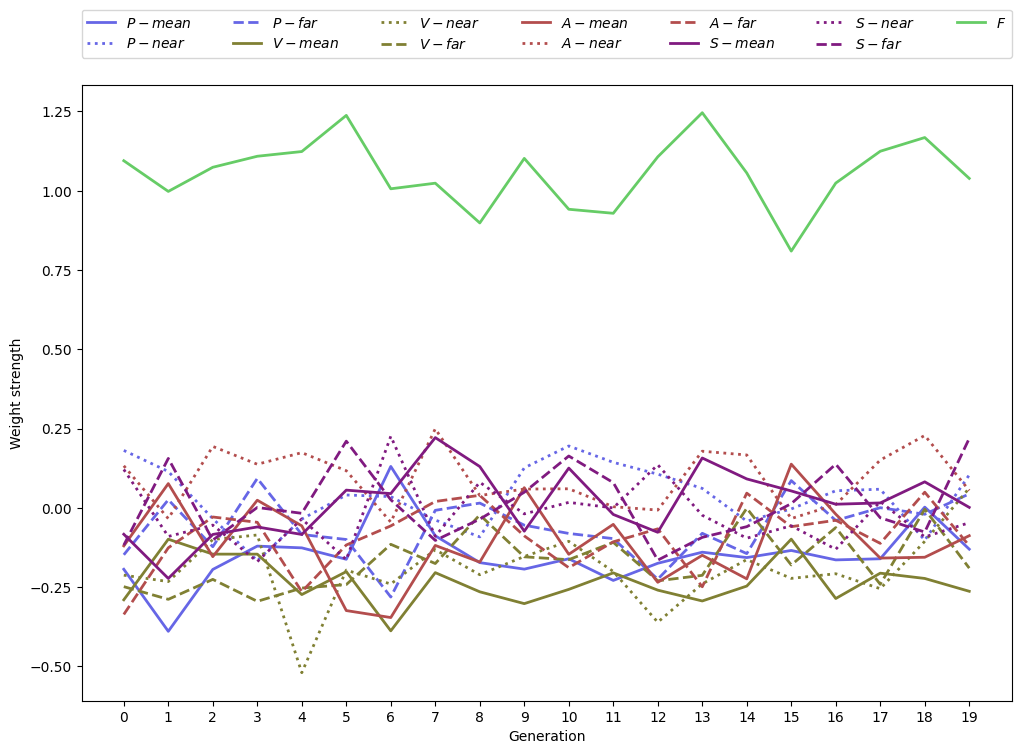

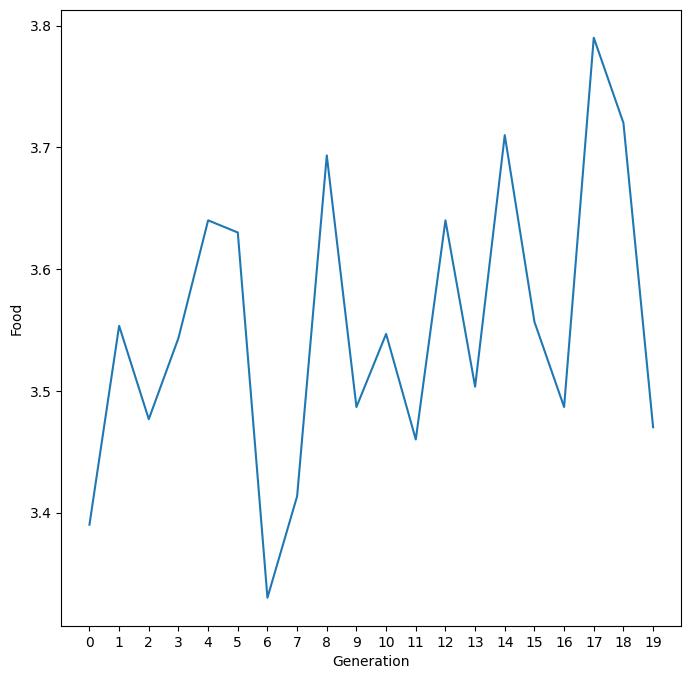

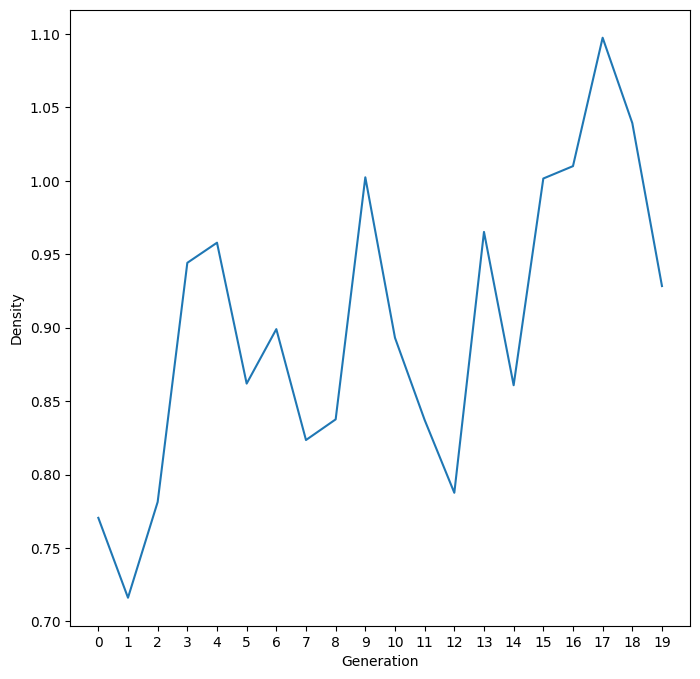

In [6]:
Food40Cooldown = read_and_average('experiments/Food40Cooldown',names,30,15)
visualize(Food40Cooldown, 'Food40Cooldown')